Orlando Osberto Cabrera Mejía #19943  
José Javier Hurtarte Hernandez #19707

# Laboratorio #2 - Detección SPAM

In [ ]:
import pandas as pd
import numpy as np
import nltk
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
%matplotlib inline

## Parte 1 - Ingeniería de Datos

### Exploración de Datos

Para el laboratorio se proporcionan dos datasets distintos. Revise la data y realice las operaciones necesarias para unificar los datasets y que el dataset  final contenga el mensaje del correo y la etiqueta que indique si es SPAM o no. 

Muestre ejemplos de los datasets individuales y del dataset final. 

In [ ]:
df1 = pd.read_csv("./completeSpamAssassin.csv")
df2 = pd.read_csv("./enronSpamSubset.csv")

In [ ]:
display(df1.head(5))
display(df2.head(5))

,Unnamed: 0,Body,Label
0,0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,3,##############################################...,1
4,4,I thought you might like these:\n1) Slim Down ...,1


   Unnamed: 0                                               Body  Label
0           0  \nSave up to 70% on Life Insurance.\nWhy Spend...      1
1           1  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
2           2  1) Fight The Risk of Cancer!\nhttp://www.adcli...      1
3           3  ##############################################...      1
4           4  I thought you might like these:\n1) Slim Down ...      1

,Unnamed: 0.1,Unnamed: 0,Body,Label
0,2469,2469,Subject: stock promo mover : cwtd\n * * * urge...,1
1,5063,5063,Subject: are you listed in major search engine...,1
2,12564,12564,"Subject: important information thu , 30 jun 20...",1
3,2796,2796,Subject: = ? utf - 8 ? q ? bask your life with...,1
4,1468,1468,"Subject: "" bidstogo "" is places to go , things...",1


   Unnamed: 0.1  Unnamed: 0  \
0          2469        2469   
1          5063        5063   
2         12564       12564   
3          2796        2796   
4          1468        1468   

                                                Body  Label  
0  Subject: stock promo mover : cwtd\n * * * urge...      1  
1  Subject: are you listed in major search engine...      1  
2  Subject: important information thu , 30 jun 20...      1  
3  Subject: = ? utf - 8 ? q ? bask your life with...      1  
4  Subject: " bidstogo " is places to go , things...      1  

In [ ]:
df = pd.concat([df1, df2], ignore_index=True)
del df1, df2

In [ ]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1'])
df = df.rename(columns={'Label': 'spam'})

In [ ]:
display(df.head(5))
print(df.describe())


               spam
count  16046.000000
mean       0.429764
std        0.495058
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000


,Body,spam
0,\nSave up to 70% on Life Insurance.\nWhy Spend...,1
1,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
2,1) Fight The Risk of Cancer!\nhttp://www.adcli...,1
3,##############################################...,1
4,I thought you might like these:\n1) Slim Down ...,1


                                                Body  spam
0  \nSave up to 70% on Life Insurance.\nWhy Spend...     1
1  1) Fight The Risk of Cancer!\nhttp://www.adcli...     1
2  1) Fight The Risk of Cancer!\nhttp://www.adcli...     1
3  ##############################################...     1
4  I thought you might like these:\n1) Slim Down ...     1

### Preprocesamiento

Aplique las técnicas de pre – procesamiento de lenguaje natural que considere necesarias (conversión de minúsculas, mayúsculas, eliminación de acentos, expansión de contracciones, eliminación de stop words, etc.) 

In [ ]:
# Convertir a minusculas
df['Bodu'] = df['Body'].apply(str)
df["Body"] = df["Body"].str.lower()

In [ ]:
# Eliminando caracteres especiales
df["Body"] = df["Body"].str.replace(r'[^a-zA-Z0-9\s]', '')

C:\Users\josej\AppData\Local\Temp\ipykernel_11672\3672544987.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df["Body"] = df["Body"].str.replace(r'[^a-zA-Z0-9\s]', '')


In [ ]:
df['Body'] = df['Body'].apply(str)
df['Body'] = df['Body'].apply(lambda x: x.replace('\n', ' '))

In [ ]:
# Eliminando stopwords
stopwords = nltk.corpus.stopwords.words('english')
df['Body'] = df['Body'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords)]))

Para obtener únicamente la raiz de las palabras

In [ ]:
stemmer = nltk.stem.PorterStemmer()
df['Body'] = df['Body'].apply(lambda x: ' '.join([stemmer.stem(word) for word in x.split()]))

In [ ]:
df['Body'] = df['Body'].apply(str)
df['Body']

0        save 70 life insur spend tolif quot save ensur...
1        1 fight risk cancer httpwwwadclickwspcfmo315sp...
2        1 fight risk cancer httpwwwadclickwspcfmo315sp...
3        adult club offer free membership instant acces...
4        thought might like 1 slim guarante lose 1012 l...
                               ...                        
16041    subject monday 22 nd oct louis half hour free ...
16042    subject miss bloomberg deal stephani believ fo...
16043    subject eop salari survey questionnair need es...
16044    subject q 3 comparison hi louis comparison fir...
16045    subject confidenti folder safe pass inform art...
Name: Body, Length: 16046, dtype: object

### Representación de texto
Utilice los modelos de BoG (para n = 1,2) y TF-IDF. Muestre algunos ejemplos de los mensajes en su 
representación numérica. 

In [ ]:
nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josej\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josej\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!



True

In [ ]:
corpus = np.array(df["Body"].to_list())

In [ ]:
stop_words = nltk.corpus.stopwords.words('english')

def normalize_document(doc):
    doc = doc.strip()
    # tokenize document
    tokens = nltk.word_tokenize(doc)
    # filter stopwords out of document
    filtered_tokens = [token for token in tokens if token not in stop_words]
    # re-create document from filtered tokens
    doc = ' '.join(filtered_tokens)
    return doc

normalize_corpus = np.vectorize(normalize_document)

norm_corpus = normalize_corpus(corpus)

### Bag of Words

In [ ]:
cv = CountVectorizer(min_df=0.1, max_df=0.8, ngram_range=(1,2))
# Min_df y Max_df nos sirven para controlar el porcentaje mínimo y máximo de apariciones de un token
cv_matrix = cv.fit_transform(norm_corpus).toarray()
df_cv = pd.DataFrame(cv_matrix, columns=cv.get_feature_names_out())

In [ ]:
df_cv["spam"] = df["spam"]

In [ ]:
df_cv.head(5)

,10,2000,2002,address,also,avail,best,busi,call,cc,...,us,use,want,way,week,well,work,would,year,spam
0,0,0,0,0,0,0,3,0,0,0,...,1,0,0,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
2,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1
3,0,0,0,0,0,0,3,0,0,0,...,1,0,0,0,0,0,0,0,1,1
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,1


   10  2000  2002  address  also  avail  best  busi  call  cc  ...  us  use  \
0   0     0     0        0     0      0     3     0     0   0  ...   1    0   
1   0     0     0        0     0      0     0     0     0   0  ...   0    1   
2   0     0     0        0     0      0     0     0     0   0  ...   0    1   
3   0     0     0        0     0      0     3     0     0   0  ...   1    0   
4   0     0     0        0     0      0     0     0     0   0  ...   0    1   

   want  way  week  well  work  would  year  spam  
0     0    0     0     0     0      0     0     1  
1     0    0     0     0     0      0     0     1  
2     0    0     0     0     0      0     0     1  
3     0    0     0     0     0      0     1     1  
4     0    0     0     0     0      0     0     1  

[5 rows x 91 columns]

### TF - IDF

In [ ]:
tv = TfidfVectorizer(ngram_range=(1,2),min_df=0.1, max_df=0.7, use_idf=True)
tv_matrix = tv.fit_transform(norm_corpus).toarray()
df_tv = pd.DataFrame(tv_matrix, columns=tv.get_feature_names_out())
del tv_matrix, tv

In [ ]:
df_tv["spam"] = df["spam"]

In [ ]:
df_tv.head(5)

,10,2000,2002,address,also,avail,best,busi,call,cc,...,us,use,want,way,week,well,work,would,year,spam
0,0.0,0.0,0.0,0.0,0.0,0.0,0.433499,0.0,0.0,0.0,...,0.127005,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
1,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.216118,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.251806,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1
3,0.0,0.0,0.0,0.0,0.0,0.0,0.241367,0.0,0.0,0.0,...,0.070715,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.079249,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.257922,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1


    10  2000  2002  address  also  avail      best  busi  call   cc  ...  \
0  0.0   0.0   0.0      0.0   0.0    0.0  0.433499   0.0   0.0  0.0  ...   
1  0.0   0.0   0.0      0.0   0.0    0.0  0.000000   0.0   0.0  0.0  ...   
2  0.0   0.0   0.0      0.0   0.0    0.0  0.000000   0.0   0.0  0.0  ...   
3  0.0   0.0   0.0      0.0   0.0    0.0  0.241367   0.0   0.0  0.0  ...   
4  0.0   0.0   0.0      0.0   0.0    0.0  0.000000   0.0   0.0  0.0  ...   

         us       use  want  way  week  well  work  would      year  spam  
0  0.127005  0.000000   0.0  0.0   0.0   0.0   0.0    0.0  0.000000     1  
1  0.000000  0.216118   0.0  0.0   0.0   0.0   0.0    0.0  0.000000     1  
2  0.000000  0.251806   0.0  0.0   0.0   0.0   0.0    0.0  0.000000     1  
3  0.070715  0.000000   0.0  0.0   0.0   0.0   0.0    0.0  0.079249     1  
4  0.000000  0.257922   0.0  0.0   0.0   0.0   0.0    0.0  0.000000     1  

[5 rows x 91 columns]

### Representación de texto

## Parte 2 - Implementación del modelo

### Separación de datos
- Datos de entrenamiento: 70%
- Datos de prueba: 30%

In [ ]:
cv_test, cv_train = train_test_split(df_cv, test_size=0.7, random_state=42)
tv_test, tv_train = train_test_split(df_tv, test_size=0.7, random_state=42)

In [ ]:
print("CV test Shape" , cv_test.shape)
print("CV train Shape" , cv_train.shape)
print("TV test Shape" , tv_test.shape)
print("TV train Shape" , tv_train.shape)

CV test Shape (4813, 91)
CV train Shape (11233, 91)
TV test Shape (4813, 91)
TV train Shape (11233, 91)


### Implementación

Utilice el algoritmo multinomial de NaiveBayes para entrenar el modelo con cada uno de los modelos de representación numérico. Muestre los valores obtenidos para las siguientes métricas: 

- Matriz de confusión
- Precisión
- Recall
- F1 Score

In [ ]:
# Naive Bayes con Bag of words 
params = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.1, 0.9]]
}
clf = MultinomialNB()
grid_search = GridSearchCV(clf, params, cv=10)
grid_search.fit(cv_train.drop(columns=["spam"]), cv_train["spam"])

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'alpha': 1.0, 'class_prior': None, 'fit_prior': False}
Best accuracy:  0.8299658863681738


In [ ]:
# Naive Bayes con Bag of words 
cv_nb_pred = grid_search.predict(cv_test.drop(columns=["spam"]))
cv_nb_acc = accuracy_score(cv_test["spam"], cv_nb_pred)

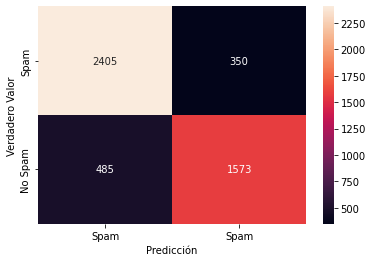

<Figure size 432x288 with 2 Axes>

In [ ]:
ax = sns.heatmap(
    confusion_matrix(cv_test["spam"], cv_nb_pred), 
    annot=True, 
    fmt="d", 
    yticklabels=["Spam", "No Spam"], 
    xticklabels=["Spam", "No Spam"],
)
ax.set(xlabel="Predicción", ylabel="Valor Verdadero")
plt.show()

In [ ]:
print(classification_report(cv_test["spam"], cv_nb_pred, target_names=["Spam", "No Spam"]))

              precision    recall  f1-score   support

        Spam       0.83      0.87      0.85      2755
     No Spam       0.82      0.76      0.79      2058

    accuracy                           0.83      4813
   macro avg       0.83      0.82      0.82      4813
weighted avg       0.83      0.83      0.83      4813



El modelo de multinomial NaiveBayes para Bag of words  clasificó correctamente 2405 mensajes como spam y clasificó correctamente 1573 mensajes como no spam. 

Esto se puede observar más a detalle en el reporte anterior, donde se puede observar el valor de precision. Este valor representa que porcentaje de los valores se clasificó correctamente, siendo que el modelo clasificó correctamente el 83% de los mensajes de spam como spam y logró clasificar correctamente el 82% de los mensajes que no eran spam como mensajes normales. 

Por otro lado, si se analiza la matriz por filas, se puede observar que el modelo clasificó un 13% de los mensajes de spam como mensajes normales o que no contenian spam y clasificó un 24% de los mensajes que no eran spam como spam. Esto se puede observal en el recall, el cual se obtuvo un 87% para los mensajes de spam y un 76% para los mensajes que no eran considerados spam.  

Al analizar más a detalle, se puede observar que el modelo predice de mejor manera los mensajes que son spam como spam que los mensajes que no son spam como mensajes normales. Esto se puede observar en la métrica del f1-score, el cual fue mejor para el caso de los mensajes de spam (85%) que para los mensajes que no contenian spam (79%).



In [ ]:
# Naive Bayes con TF - IDF
params = {
    'alpha': [0.1, 0.5, 1.0, 2.0],
    'fit_prior': [True, False],
    'class_prior': [None, [0.5, 0.5], [0.1, 0.9], [0.9, 0.1], [0.2, 0.8], [0.8, 0.2]]
}
clf = MultinomialNB()
grid_search = GridSearchCV(clf, params, cv=10)
grid_search.fit(tv_train.drop(columns=["spam"]), tv_train["spam"])

print("Best hyperparameters: ", grid_search.best_params_)
print("Best accuracy: ", grid_search.best_score_)

Best hyperparameters:  {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
Best accuracy:  0.8570281528569572


In [ ]:
tv_nb_pred = grid_search.predict(tv_test.drop(columns=["spam"]))
tv_nb_acc = accuracy_score(tv_test["spam"], cv_nb_pred)

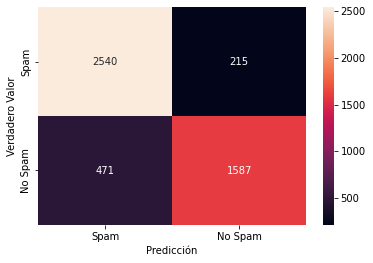

<Figure size 432x288 with 2 Axes>

In [ ]:
ax = sns.heatmap(
    confusion_matrix(tv_test["spam"], tv_nb_pred), 
    annot=True, 
    fmt="d", 
    yticklabels=["Spam", "No Spam"], 
    xticklabels=["Spam", "No Spam"],
)
ax.set(xlabel="Predicción", ylabel="Valor Verdadero")
plt.show()

In [ ]:
print(classification_report(tv_test["spam"], tv_nb_pred, target_names=["Spam", "No Spam"]))

              precision    recall  f1-score   support

        Spam       0.84      0.92      0.88      2755
     No Spam       0.88      0.77      0.82      2058

    accuracy                           0.86      4813
   macro avg       0.86      0.85      0.85      4813
weighted avg       0.86      0.86      0.86      4813



El modelo de multinomial NaiveBayes para TF - IDF clasificó correctamente 2540 mensajes como spam y clasificó correctamente 1587 mensajes como no spam. 

Esto se puede observar más a detalle en el reporte anterior, donde se puede observar el valor de precision. Este valor representa que porcentaje de los valores se clasificó correctamente, siendo que el modelo clasificó correctamente el 84% de los mensajes de spam como spam y logró clasificar correctamente el 88% de los mensajes que no eran spam como mensajes normales. 

Por otro lado, si se analiza la matriz por filas, se puede observar que el modelo clasificó un 12% de los mensajes de spam como mensajes normales o que no contenian spam y clasificó un 23% de los mensajes que no eran spam como spam. Esto se puede observar en el recall, el cual se obtuvo un 88% para los mensajes de spam y un 77% para los mensajes que no eran considerados spam.  

Al analizar más a detalle, se puede observar que el modelo predice de mejor manera los mensajes que son spam como spam que los mensajes que no son spam como mensajes normales. Esto se puede observar en la métrica del f1-score, el cual fue mejor para el caso de los mensajes de spam (88%) que para los mensajes que no contenian spam (82%).

### Discusión

#### Compare los valores para cada modelo de representación numérico. ¿Qué modelo produjo el mejor resultado, BoG o TF-IDF? ¿A que se debe la mejora? Explique los valores obtenidos en las métricas para el mejor modelo. 

Luego de analizar los resultados, se puede concluir que el modelo para TF - IDF dio un mejor resultado en general. Este modelo obtuvo valores más grande para todas las mediciones, pero destaca el recall para los mensajes de Spam y la precisión para los mensajes que no contenian spam. Al analizar las dos matrices de confusion, se puede observar que el modelo de TF - IDF obtuvo menos falsos negativos que el modelo realizado para Bag of Words. Esto significa que este modelo clasificó en menor medida los mensajes que eran spam como mensajes que no son spam. teniendo un 6% más de sensibilidad al momento de clasificar los que no son spam y un 1% más de sensibilidad al clasificar los que si son spam. Estas leves mejoras se pueden deber a que el modelo TF- IDF calcula que tan importante es cada palabra en el documento basado en su frecuencia por lo que cada vector producido toma en cuenta la importancia de cada palabra en el texto, por lo cual puede ser la causa de que se produzcan mejores resultados, ya que el BoG únicamente cuenta las ocurrencias sin tomar en cuenta un puntaje de importancia.